# Statistics Foundations

Used the book "Statistical Methods for Machine Learning" by Jason Brownlee as a main reference.

## Gaussian/Normal Distribution

Source: 
1. https://medium.com/ai-techsystems/gaussian-distribution-why-is-it-important-in-data-science-and-machine-learning-9adbe0e5f8ac#:~:text=Gaussian%20distribution%20is%20the%20most,two%20dices%20and%20so%20on.


2. <b><u>https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/</u></b>  <- Great article

3. StatQuest video - https://youtu.be/rzFX5NWojp0


### What is it?
A distribution of data refers to the shape it has when you graph it, such as with a histogram.It is simply a collection of value and frequency of a given observation, like age of a population.
The most commonly seen and therefore well-known distribution of continuous values is the bell
curve. It is known as the normal distribution. 

Samples of a ideal Gaussian distribution (aka normal distribution or bell curve) follow bell curve distribution meaning values are more likely around mean over extremes.
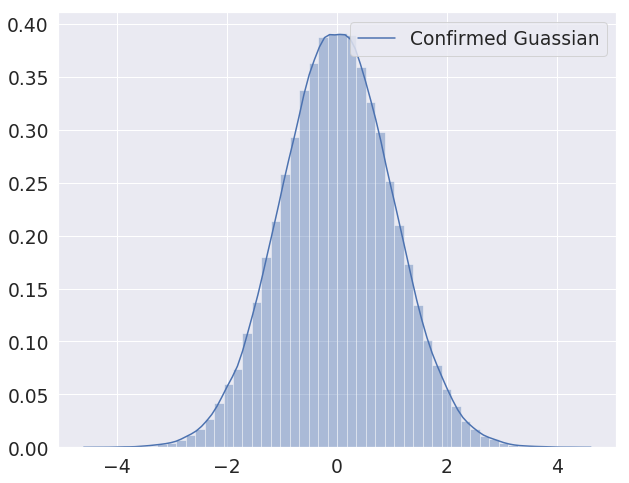

### Why is Gaussian Distribution Important?

1. Gaussian distribution is the most important probability distribution in statistics because it fits many natural phenomena like age, height, test-scores, IQ scores, sum of the rolls of two dices and so on.
2. Datasets with Gaussian distributions makes applicable to a variety of methods that fall under parametric statistics. The methods such as least squares parameter fitting are applicable only to datasets with normal or normal-like distributions.
3. Conclusions and summaries derived from such analysis are intuitive and easy to explain to audiences with basic knowledge of statistics.

### Central Tendency

The central tendency of a distribution refers to the middle or typical value in the distribution.
The most common or most likely value. In the Gaussian distribution, the central tendency is
called the mean, or more formally, the arithmetic mean, and is one of the two main parameters
that definnes any Gaussian distribution. The mean of a sample is calculated as the sum of the
observations divided by the total number of observations in the sample.

### Properties of Normal Distribution

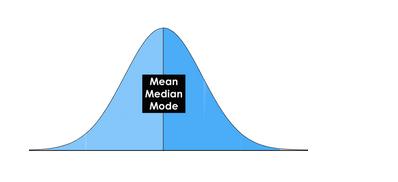

We can simplify the Normal Distribution’s Probability Density by using only two parameters: 𝝻 Mean and 𝛔2. This curve is symmetric around the Mean. Also as you can see for this distribution, the Mean, Median, and Mode are all the same.

### Empirical Rule for Normal Distribution

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/Screenshot-from-2020-03-06-17-26-30.png">

According to the Empirical Rule for Normal Distribution:

- <b>68.27%</b> of data lies within 1 standard deviation of the mean
- <b>95.45%</b> of data lies within 2 standard deviations of the mean
- <b>99.73%</b> of data lies within 3 standard deviations of the mean

Thus, almost all the data lies within <b>3</b> standard deviations. This rule enables us to check for <b>Outliers</b> and is very helpful when determining the normality of any distribution.

## IID

Source:
1. Video - https://youtu.be/lhzndcgCXeo
2. Github - https://github.com/knathanieltucker/data-science-foundations/blob/master/foundations/05.IID.ipynb

A set of variables is independent and identically distributed (IID) if 
1. Independent - the variables are all mutually independent (see independence) and 
2. Identically distributed - the variables are all drawn from the same probability distribution.

In machine learning theory, i.i.d. assumption is often made for training datasets to imply that all samples stem from the same process and that the process is assumed to have no memory of past generated samples.

## Law of Large Numbers

The law of large numbers is a theorem from probability and statistics that suggests that the
average result from repeating an experiment multiple times will better approximate the true or
expected underlying result. The law of large numbers supports the intuition that the sample becomes more representative
of the population as its size is increased.

## Regression to the Mean

The law of large numbers helps us understand why we cannot trust a single observation from an
experiment in isolation. We expect that a single result or the mean result from a small sample
is likely. That is close to the central tendency, the mean of the population distribution. It may
not be; in fact, it may be very strange or unlikely.

As we increase the sample size,the mean of the sample will move back toward the
population mean, back toward the true underlying expected value. This is called regression to
the mean or sometimes reversion to the mean. It is why we must be skeptical of inferences from
small sample sizes, called small n.

## Law of Truly Large Numbers

This is the idea that when we start investigating or working with extremely large samples of observations,
we increase the likelihood of seeing something strange. That by having so many samples of the
underlying population distribution, the sample will contain some astronomically rare events.
Again, we must be wary not to make inferences from single cases. This is especially important
to consider when running queries and investigating big data.

## Worked Example of Law of Large Numbers

We can demonstrate the law of large numbers with a small worked example.

In [2]:
import numpy as np
from scipy.stats import norm
import plotly.express as px

xaxis = np.arange(30,70,1) #generate numbers starting from 30 with step =1 so 30,31,32,...69 (70 is excluded)
yaxis = norm.pdf(xaxis,50,5) #generate Gaussian distribution with a mean of 50 and a standard deviation of 5.

px.line(x=xaxis,y=yaxis)

Since we chose to generate a Gaussian distribution with mean 50, the expected value or mean value of the population is 50.

We will make independent random samples from the population. We can create samples of different sizes and
calculate the mean. Given our intuition and the law of large numbers, we expect that as the
size of the sample is increased, the sample mean will better approximate the population mean.

In [4]:
#An array of random Gaussian values can be generated using the randn()
from numpy.random import randn

#prints 10 Gaussian values drawn from a standard Gaussian distribution i.e. mean of 0.0 and a standard deviation of 1
randn(10) 

array([ 0.59817157,  0.64199821, -1.78578751, -1.48973011,  0.36599599,
        0.58679853,  0.67000176, -1.97938218, -1.0768738 ,  0.80787597])

Values from a standard Gaussian distribution can be scaled by multiplying the value by the
standard deviation and adding the mean from the desired scaled distribution. For example:

scaledvalue = mean + (value * stdev)

In [5]:
50+(randn(10)*5)

array([51.47084513, 44.83217798, 40.65867915, 54.12594929, 45.59717195,
       53.01862734, 55.43961553, 49.34676813, 49.86742476, 43.5870493 ])

In [9]:
from numpy.random import seed

# seed the random number generator
seed(1)

# sample sizes
sizes=[x for x in range(10,20000,200)]

#finding mean of the gaussian values generated using different sample sizes
mean = [np.mean(50+(randn(size)*5)) for size in sizes] 

In [12]:
mean[:2]

[49.5142955459695, 50.465491303612566]

In [11]:
px.line(x=sizes,y=mean)

Generally, we can see that larger sample sizes have mean closer to 50, and we would expect this trend to continue, on average.

### How does Law of Large Numbers apply in ML?

The data used to train and test the model must be representative of the observations from the domain.
This really means that it must contain enough information to generalize to the true unknown
and underlying distribution of the population.You may
choose to exclude sections of the underlying population by setting hard limits on observed values
(e.g. for outliers) where you expect data to be too sparse to model effectively.

## Central Limit Theorem

Source: Video Statquest (really good explanation) - https://youtu.be/YAlJCEDH2uY

The theorem states that as the size of the sample increases, the distribution of the mean across
multiple samples will approximate a Gaussian distribution. 

### Law of large Numbers vs Central Limit Theorem

The central limit theorem is often confused with the law of large numbers by beginners. The
law of large numbers is another different theorem from statistics. It is simpler in that it states
that as the size of a sample is increased, the more accurate of an estimate the sample mean will
be of the population mean. The central limit theorem does not state anything about a single
sample mean; instead, it is broader and states something about the shape or the distribution of
sample means.

The law of large numbers is intuitive. It is why we think that collecting more data will lead
to a more representative sample of observations from the domain. The theorem supports this
intuition. The central limit theorem is not intuitive. Instead, it is a finding that we can exploit
in order to make claims about sample means.

### Worked Example - 1

We can make the central limit theorem concrete with a worked example involving the rolling of
die

In [17]:
#we will use randint() to generate N number of observations b/w 1 and 6

from numpy.random import randint
from numpy.random import seed

#seed the random number generator
seed(123)

#generate a sample of die rolls
rolls=randint(1,7,50)

In [18]:
len(rolls)

50

In [19]:
np.mean(rolls)

3.26

We know the mean of the population is = (1+2+3+4+5+6)/6 = 3.5

We can see that the mean of the sample is slightly wrong, which is to be expected because
it is an estimate of the population mean.

This is the result of rolling the simulated die 50 times. We can then repeat this process
multiple times, such as 1,000. This will give us a result of 1,000 sample means. According to the
central limit theorem, the distribution of these sample means will be Gaussian/Normal.

In [24]:
#generate a sample of die rolls
means= [np.mean(randint(1,6,50)) for _ in range(10000)]

In [25]:
px.histogram(means)

### Worked Example - 2

Source:https://www.analyticsvidhya.com/blog/2019/05/statistics-101-introduction-central-limit-theorem/

In [28]:
import pandas as pd
df= pd.read_csv(r'C:\Users\aasth\Desktop\Data analytics\Data Science\Books\Stats methods for ML - Jason Browlee\Clt-data.csv')

In [29]:
df.head(2)

Wall Thickness
0       12.354875
1       12.617417

In [30]:
df.describe()

Wall Thickness
count     9000.000000
mean        12.802049
std          0.289333
min         12.300281
25%         12.552225
50%         12.804560
75%         13.051388
max         13.299998

In [31]:
px.histogram(df)

The population mean is 12.802049. The histogram is clearly not normally distributed. 

Therefore, we need to draw sufficient samples of different sizes and compute their means (known as sample means). We will then plot those sample means to get a normal distribution.In general, a sample size of <b>30</b> is considered sufficient

In [36]:
df['Wall Thickness'].sample(n=3, random_state=1) #Extract 3 random elements from the Series df['Wall Thickness']

5221    12.528650
2975    13.236639
5786    12.519776
Name: Wall Thickness, dtype: float64

In [37]:
np.mean(df['Wall Thickness'].sample(n=3, random_state=1))

12.761688456666667

In [47]:
##We will take sample size=30, 50 & 500 samples=9000

size_30=[np.mean(df['Wall Thickness'].sample(n=30,replace=True)) for _ in range(9000)]
px.histogram(x=size_30)

In [48]:
size_50=[np.mean(df['Wall Thickness'].sample(n=50,replace=True)) for _ in range(9000)]
px.histogram(x=size_50)

In [49]:
size_500=[np.mean(df['Wall Thickness'].sample(n=500,replace=True)) for _ in range(9000)]
px.histogram(x=size_500)

Here, we get a good bell-shaped curve and the sampling distribution approaches normal distribution as the sample sizes increase. Therefore, we can consider the sampling distributions as normal 

### Where is Central Limit theorem used?

1. Hypothesis testing - Analyzing data involves statistical methods like hypothesis testing and constructing confidence intervals. These methods assume that the population is normally distributed. In the case of unknown or non-normal distributions, we treat the sampling distribution as normal according to the central limit theorem

2. Confidence interval - Also, the sample mean can be used to create the range of values known as a confidence interval (that is likely to consist of the population mean)